# The dataset: ElectricityLoadDiagrams20112014 Dataset Explanation

## Overview

The file `LD2011_2014.txt` is the core file of the **ElectricityLoadDiagrams20112014** dataset. It contains detailed electricity consumption measurements for hundreds of clients, recorded at regular 15-minute intervals, spanning from **January 1, 2011** to **December 31, 2014**.

This dataset is suitable for a wide range of **time series analysis** and **signal processing** tasks, including but not limited to:

* Anomaly detection
* Seasonality decomposition
* Forecasting (short-term and long-term)
* Customer segmentation
* Load clustering
* Energy demand profiling

## Structure

* **Rows**: Each row represents a single **timestamped reading**, recorded every **15 minutes**.
* **Columns**: Each column corresponds to a **unique client/metre ID** (e.g., `MT_001`, `MT_002`, ...).
* **Values**: Consumption values in **kilowatts (kW)**.

Example of the raw format:

| Timestamp           | MT_001 | MT_002 | MT_003 | ... |
| ------------------- | ------ | ------ | ------ | --- |
| 2011-01-01 00:15:00 | 1.118  | 1.055  | 1.175  | ... |
| 2011-01-01 00:30:00 | 1.102  | 1.067  | 1.156  | ... |
| ...                 | ...    | ...    | ...    | ... |


## Time Range

* **Start**: 2011-01-01 00:15:00
* **End**: 2014-12-31 23:45:00
* **Frequency**: Every 15 minutes
* **Total Duration**: 4 full years

## Data Characteristics

* More than **370 clients/meters**
* Some columns contain **missing values**, which should be filled using techniques like forward-fill or interpolation
* Data can be **resampled** to hourly, daily, or weekly levels depending on the use case
* Seasonal trends are clearly visible (e.g., daily/weekly cycles)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the ZIP file in your Google Drive
zip_path = "/content/drive/MyDrive/Portfolio datasets/Signal processing/electricityloaddiagrams20112014.zip"

# Destination folder to extract to
extract_path = "/content/electricityLoadDiagrams20112014"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# Step 1: Load the file
# ----------------------------------------

file_path = "/content/electricityLoadDiagrams20112014/LD2011_2014.txt"

df = pd.read_csv(
    file_path,
    sep=";",
    index_col=0,
    parse_dates=True,
    decimal=","
)
df.index.name = "timestamp"
df.columns = [col.strip() for col in df.columns]

print("Raw shape:", df.shape)
print("df:", df.head())

Raw shape: (140256, 370)
df:                      MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_361  MT_362  MT_363  \
timestamp                                    ...                           
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0  

#  Hourly data analysis

# Hourly Electricity Consumption – 4 Random Clients (2011–2015)

This chart visualizes the **hourly power consumption (in kW)** for four randomly selected clients from the dataset, over a 4-year period (2011–2015). Each line represents one client's consumption trend across time.

---

## Client Summaries:

* **MT_249** (blue):
  Moderate consumption with gradual growth until 2012, followed by irregular gaps and a sharp decline—likely a medium-scale commercial client or one with data quality issues.

* **MT_214** (orange):
  Extremely high and volatile usage with clear seasonal peaks and heavy load patterns—probably an industrial facility or large-scale enterprise.

* **MT_015** (green):
  Very low and stable consumption, showing little variation—likely a low-usage client such as a residential site or minimally active location.

* **MT_059** (red):
  Steady, medium-level consumption with periodic drops, indicating consistent operation punctuated by shutdowns or off-periods—possibly a manufacturing or logistics site.


Hourly shape: (35065, 370)
Sample clients: ['MT_249' 'MT_214' 'MT_015' 'MT_059']


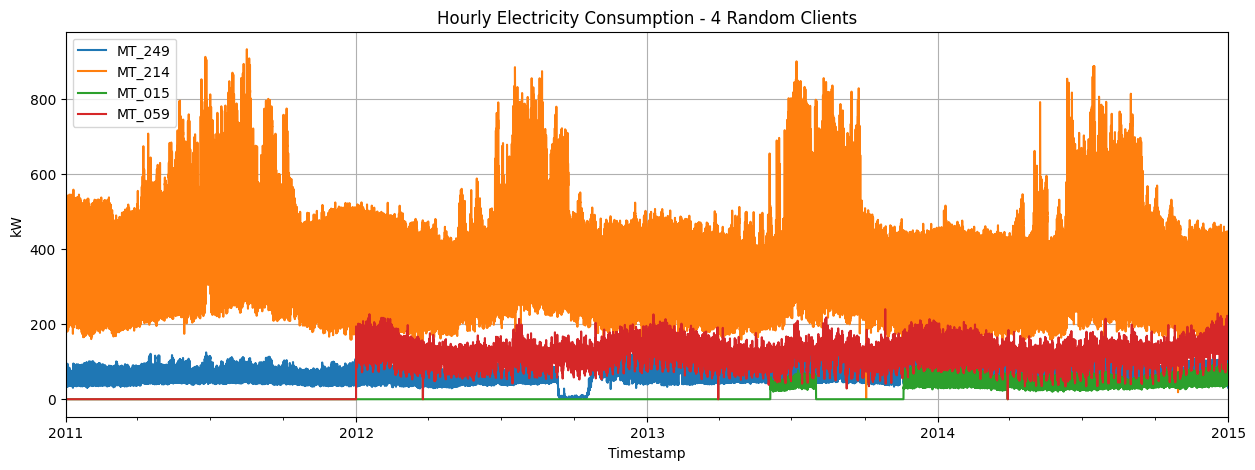

In [7]:
import numpy as np

# ----------------------------------------
# Step 2: Data cleaning
# ----------------------------------------

# Drop columns (clients) with more than 90% missing data
df = df.dropna(axis=1, thresh=int(0.1 * len(df)))

# Sort index to ensure time order
df = df.sort_index()

# ----------------------------------------
# Step 3: Resample to hourly frequency (mean of 4×15min)
# ----------------------------------------
df_hourly = df.resample("1h").mean()

# Fill missing values using modern syntax
df_hourly = df_hourly.ffill().bfill()

print("Hourly shape:", df_hourly.shape)

# ----------------------------------------
# Step 4: Select 4 random clients and plot
# ----------------------------------------

random_clients = np.random.choice(df_hourly.columns, size=4, replace=False)
print("Sample clients:", random_clients)

df_hourly[random_clients].plot(figsize=(15, 5), title="Hourly Electricity Consumption - 4 Random Clients")
plt.ylabel("kW")
plt.xlabel("Timestamp")
plt.grid(True)
plt.show()


# Z-Score Anomaly Detection – 4 Clients Summary

This analysis detects hourly electricity consumption anomalies for four clients using the **Z-Score method** with a threshold of **|Z| > 3σ**.

Each client's time series is analyzed individually, and data points that deviate significantly from the mean (by more than 3 standard deviations) are marked as **anomalies**.

Anomalies are highlighted as **red dots** on the respective time series plots, making it easy to visually identify unusual consumption spikes or drops.

---

## Methodology

* The **Z-Score** is computed as:

  $$
  Z = \frac{x - \mu}{\sigma}
  $$

  where:

  * $x$: hourly consumption value
  * $\mu$: mean of the client’s entire time series
  * $\sigma$: standard deviation of the time series

* A data point is labeled as an **anomaly** if:

  $$
  |Z| > 3
  $$

* This threshold identifies statistically rare events, assuming a normal distribution.

---

## Visualization

* Each plot displays:

  * The **hourly load signal** (blue line)
  * The **anomalous points** (red dots)
* Enables quick comparison of behavior across multiple clients



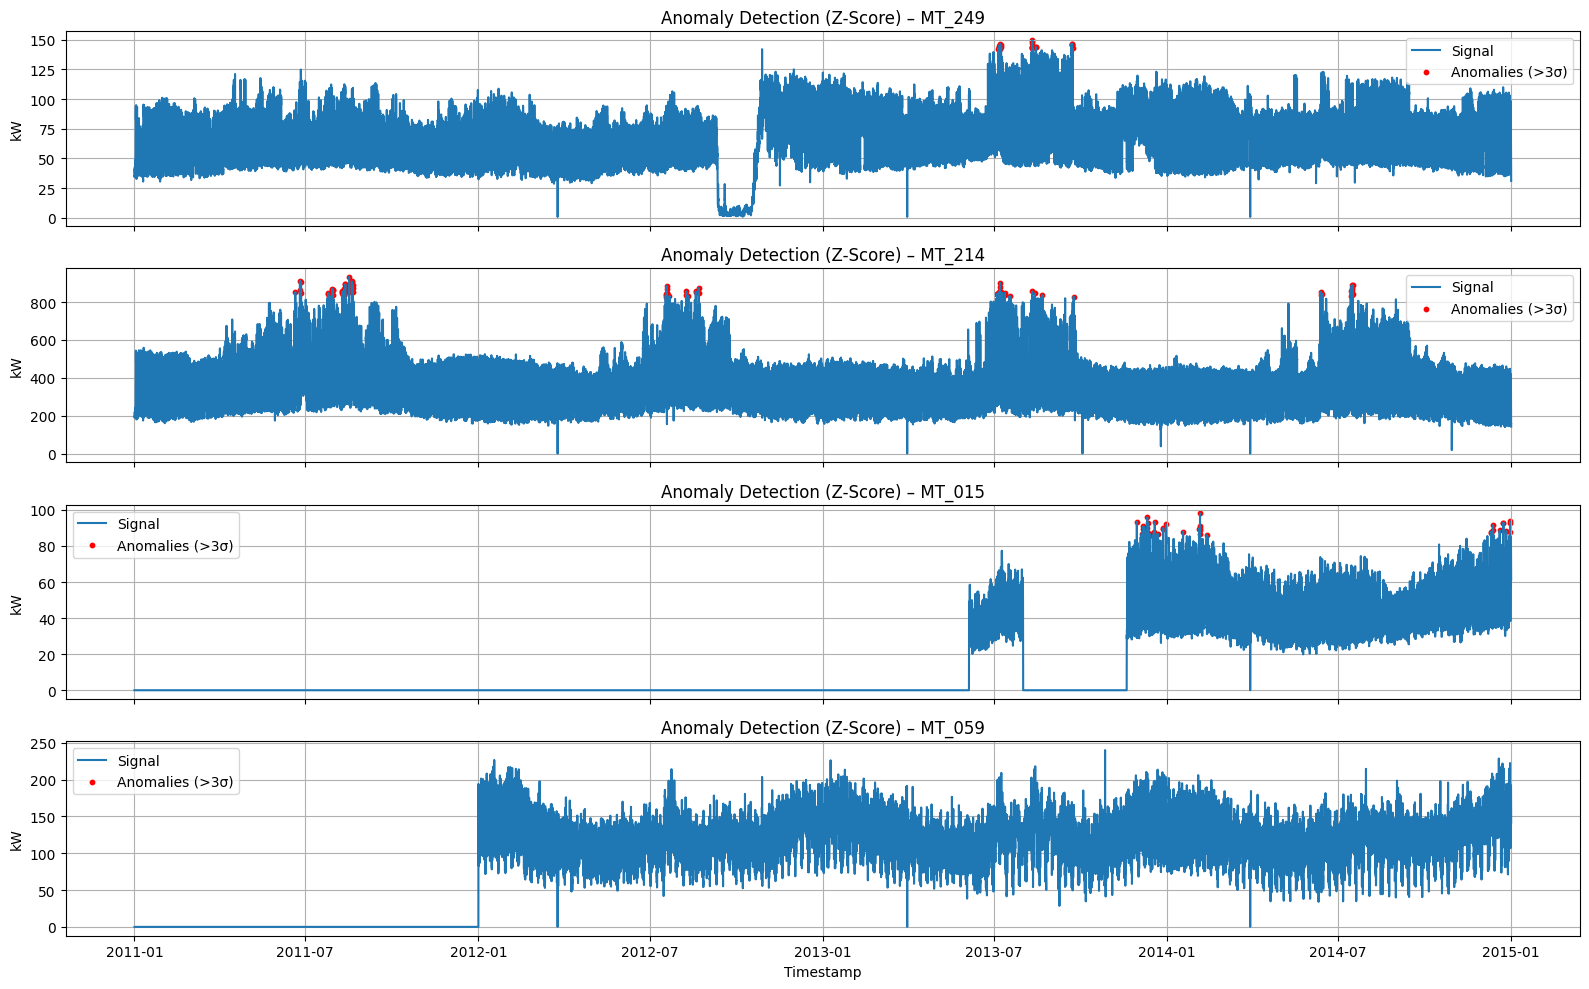

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Define the selected clients (same as in previous cell)
selected_clients = ['MT_249', 'MT_214', 'MT_015', 'MT_059']

# Plot settings
fig, axes = plt.subplots(len(selected_clients), 1, figsize=(16, 10), sharex=True)

for i, client in enumerate(selected_clients):
    signal = df_hourly[client]
    z_scores = zscore(signal, nan_policy='omit')
    anomalies = np.abs(z_scores) > 3

    ax = axes[i]
    ax.plot(signal.index, signal, label="Signal")
    ax.scatter(signal.index[anomalies], signal[anomalies], color='red', s=10, label="Anomalies (>3σ)")
    ax.set_title(f"Anomaly Detection (Z-Score) – {client}")
    ax.set_ylabel("kW")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Timestamp")
plt.tight_layout()
plt.show()


# Frequency Analysis (FFT) – 4 Clients

We used the **Fast Fourier Transform (FFT)** to analyze the hourly electricity usage of these clients:

* `MT_249`, `MT_214`, `MT_015`, `MT_059`

### What We Did:

* Removed the average from each signal (detrending)
* Applied FFT to move from **time domain** to **frequency domain**
* Plotted only the **positive frequencies**
* Showed the **amplitude** (strength) of each frequency

---

## What the Plots Show:

* **X-axis**: Frequency (1/hour)
* **Y-axis**: Amplitude of each frequency component
* Peaks = **repeating patterns** in the signal

---

## Insights per Client:

* **MT_249**: Strong low-frequency cycles, likely daily/weekly patterns
* **MT_214**: Very strong and regular periodicity, possibly industrial usage
* **MT_015**: Noticeable cycles, but less regular
* **MT_059**: Many overlapping cycles, suggesting complex seasonal behavior

---

## Why FFT Is Useful:

* Detects **seasonality and cycles**
* Helps with **forecasting and clustering**
* Highlights **hidden patterns** in the data

---


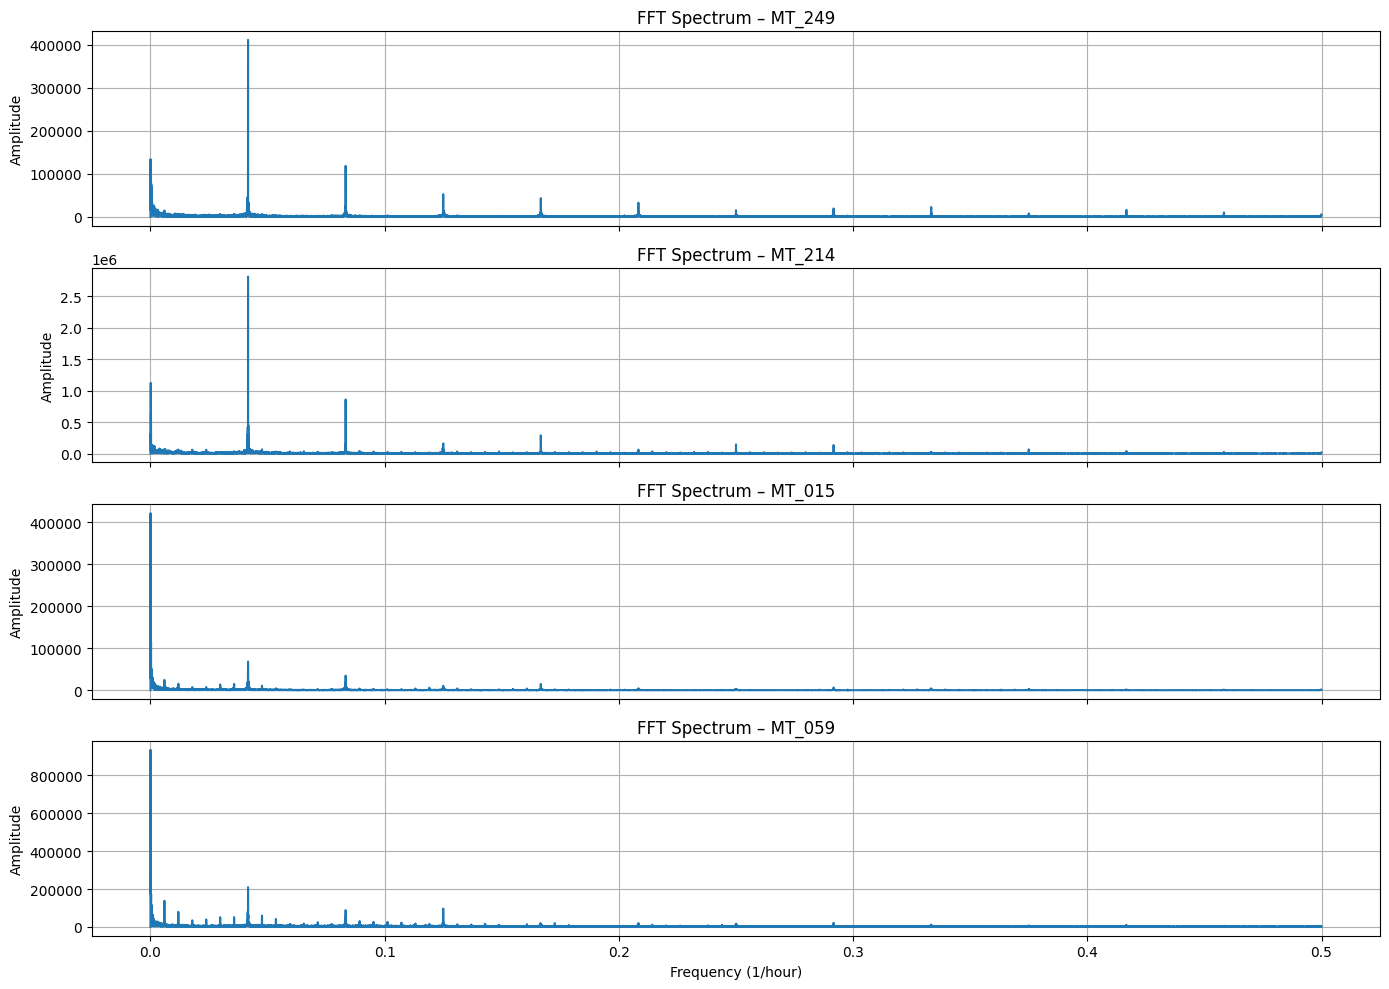

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the selected clients
selected_clients = ['MT_249', 'MT_214', 'MT_015', 'MT_059']

# Plot FFT spectrum for each client
fig, axes = plt.subplots(len(selected_clients), 1, figsize=(14, 10), sharex=True)

for i, client in enumerate(selected_clients):
    signal = df_hourly[client]
    detrended = signal - signal.mean()

    fft_vals = np.fft.fft(detrended)
    fft_freqs = np.fft.fftfreq(len(fft_vals), d=1)

    ax = axes[i]
    ax.plot(fft_freqs[:len(fft_vals)//2], np.abs(fft_vals[:len(fft_vals)//2]))
    ax.set_title(f"FFT Spectrum – {client}")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

axes[-1].set_xlabel("Frequency (1/hour)")
plt.tight_layout()
plt.show()


# Wavelet Transform – four clients

We applied a **Wavelet Transform** using the **Daubechies 4 (db4)** wavelet on the hourly electricity consumption of four clients:

* `MT_249`, `MT_214`, `MT_015`, `MT_059`

Each signal was **decomposed into 4 levels**, and we plotted only the **detail coefficients** (D1–D4), which capture **short-term to mid-term changes**.

---

## Results Overview

* **MT_249**: Strong early spikes in D1–D2, gradual shifts in D3–D4
* **MT_214**: Very large, periodic patterns in D1–D2, stable D4
* **MT_015**: Late activation; changes begin mid-series, clearly visible in D1–D2
* **MT_059**: High-frequency bursts early on; long-term structure in D4

---

## Why This Matters

* D1–D4 help detect **sudden changes**, **anomalies**, and **pattern shifts**
* Useful for **behavioral monitoring**, **segmentation**, and **feature extraction**

---


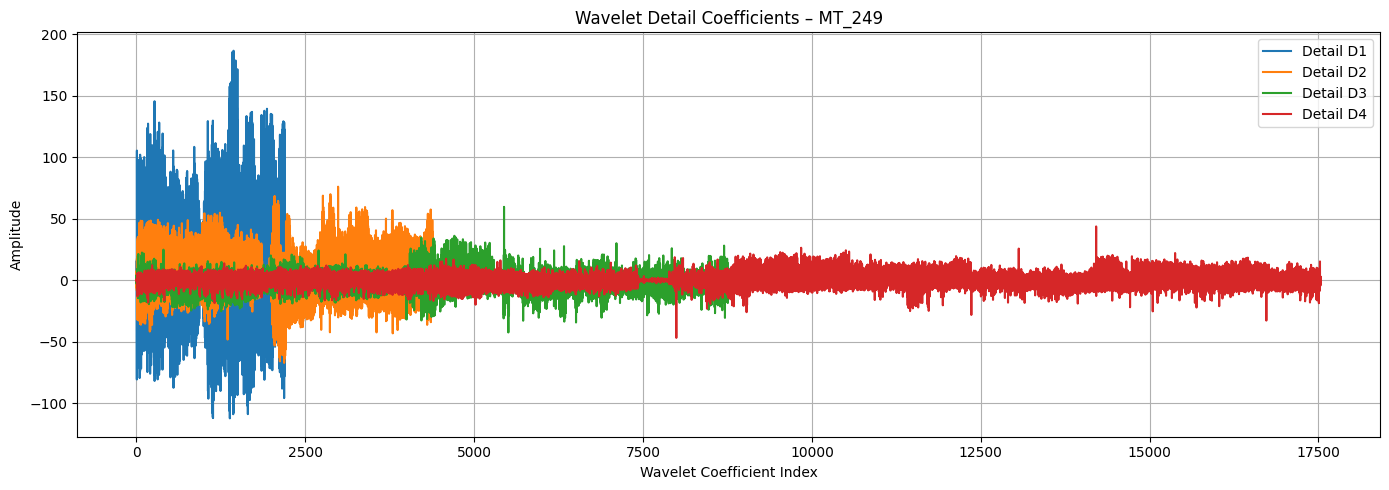

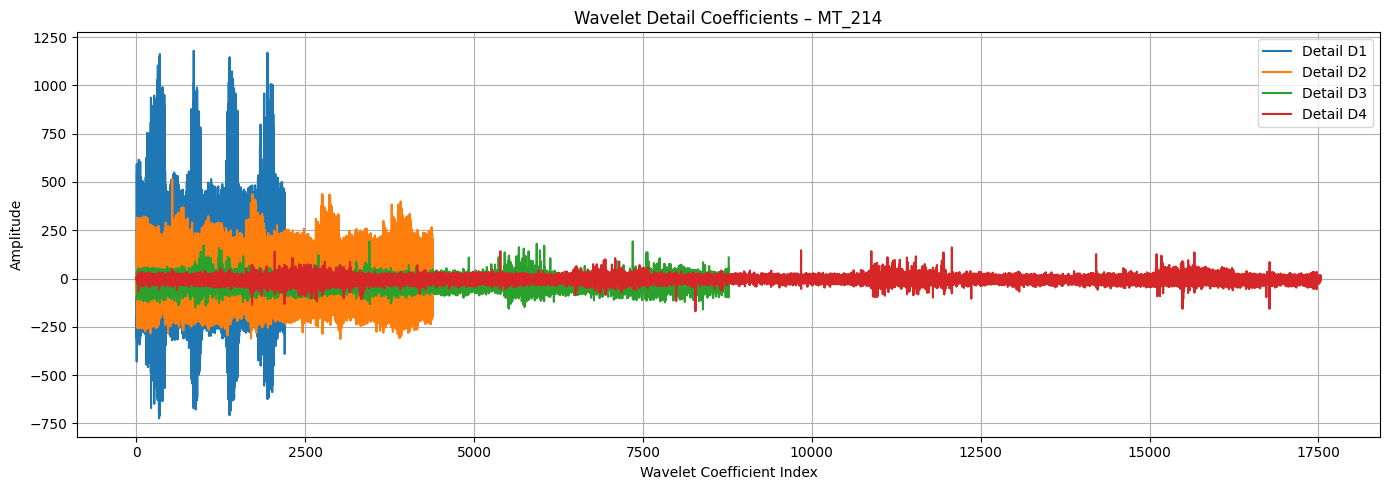

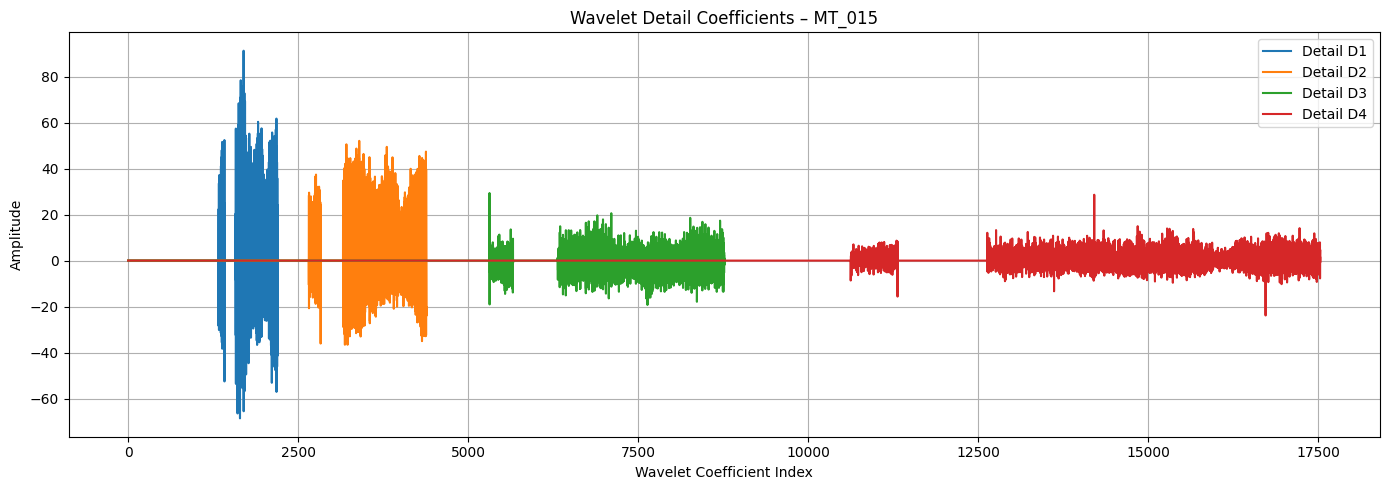

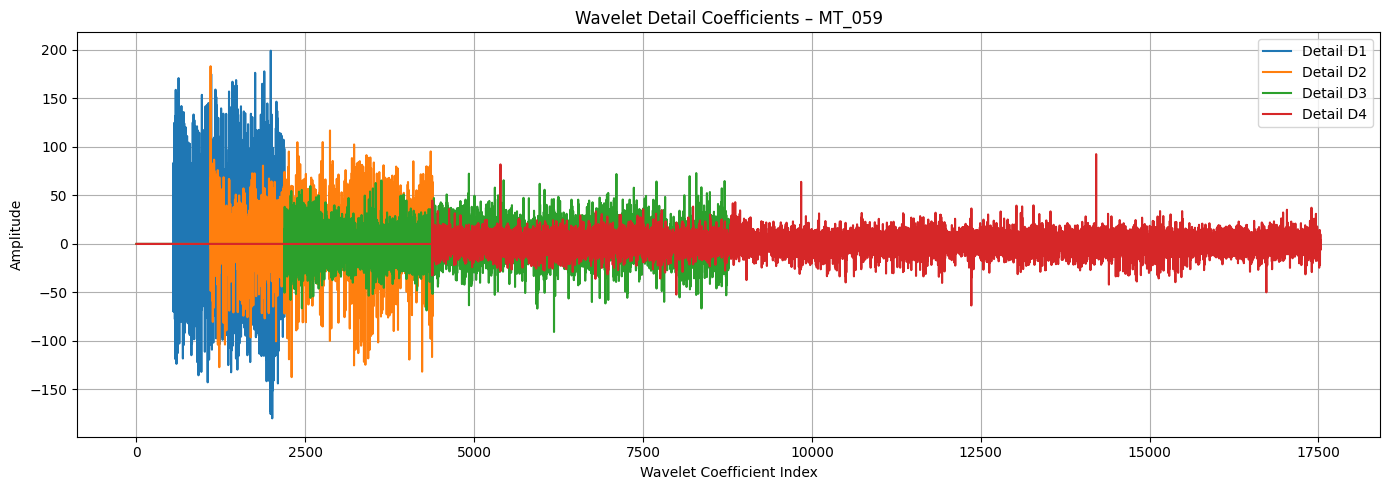

In [10]:
import pywt
import matplotlib.pyplot as plt

# Define the selected clients
selected_clients = ['MT_249', 'MT_214', 'MT_015', 'MT_059']

# Wavelet settings
wavelet = 'db4'
level = 4

# Plot for each client
for client in selected_clients:
    signal = df_hourly[client].ffill()  # Fill for completeness
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Skip the approximation (A4), plot only details D1–D4
    plt.figure(figsize=(14, 5))
    for i, detail in enumerate(coeffs[1:], 1):
        plt.plot(detail, label=f'Detail D{i}')

    plt.title(f"Wavelet Detail Coefficients – {client}")
    plt.xlabel("Wavelet Coefficient Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# STL Decomposition – 4 Clients

We used **STL (Seasonal-Trend decomposition using Loess)** to break down the daily electricity consumption of four clients:

* `MT_249`, `MT_214`, `MT_015`, `MT_059`

### What We Did:

* Converted each hourly signal to **daily averages**
* Used `STL()` with a **seasonal period of 13 days**
* Decomposed each time series into:

  * **Trend**: long-term behavior
  * **Seasonal**: repeating short-term cycles
  * **Residual**: irregular fluctuations (anomalies, noise)

---

## What the Plots Show:

### **MT_249**

* Clear long-term drop and recovery in trend
* Regular seasonal dips
* Residuals show scattered anomalies

### **MT_214**

* Strong seasonal patterns repeating every few months
* Trend reflects structured industrial behavior
* Residuals include several sharp spikes

### **MT_015**

* Flat before 2013, then sudden activation
* Seasonality and anomalies appear only in later periods

### **MT_059**

* Usage begins sharply in 2012
* Clear seasonal cycles and consistent long-term trend
* Residuals highlight consumption spikes and outliers

---

STL helps us understand **how energy patterns change over time**, separating **expected cycles** from **unusual behavior**.


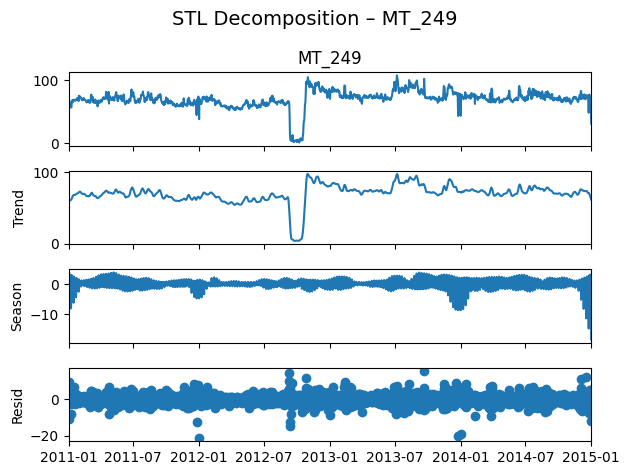

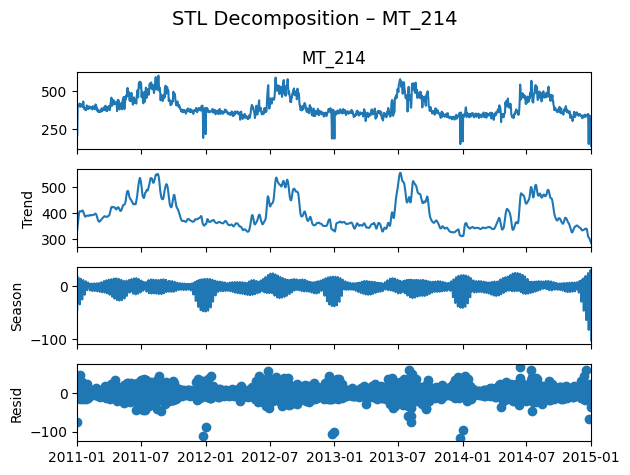

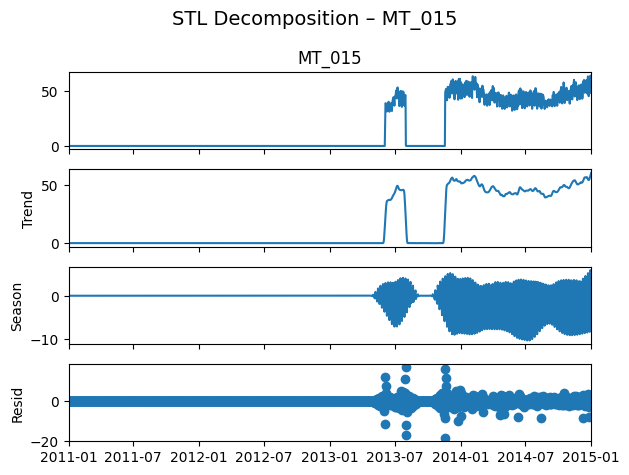

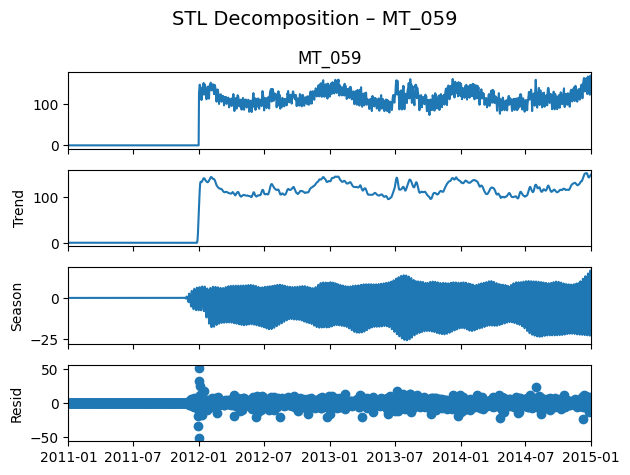

In [12]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Define the selected clients
selected_clients = ['MT_249', 'MT_214', 'MT_015', 'MT_059']

# Make sure df_common includes only the selected clients
df_common = df_hourly[selected_clients].copy()

# Loop through each client and apply STL
for client in selected_clients:
    # Convert to daily signal
    signal_daily = df_common[client].resample("1D").mean().interpolate()

    # Apply STL (seasonal period = 13 days)
    stl = STL(signal_daily, seasonal=13)
    result = stl.fit()

    # Plot results
    result.plot()
    plt.suptitle(f"STL Decomposition – {client}", fontsize=14)
    plt.tight_layout()
    plt.show()


### Cluster All Clients by Daily Average Patterns

# Clustering Analysis Summary – Electricity Load Clients

## 1. **Goal**

We clustered clients based on their **daily electricity consumption patterns** to discover groups with similar behavior and identify outliers.

---

## 2. **Elbow Method – Choosing k**

We used the **Elbow Method** to choose the optimal number of clusters (`k`) by plotting **inertia** (within-cluster variance) for `k = 1 to 10`.

* The **"elbow point"** was at **k = 3 or 4**
* Beyond `k = 4`, improvements became minimal

This guided us to test both **k = 3** and **k = 4**

---

## 3. **Clustering with KMeans**

We applied **KMeans clustering** using both:

* `k = 3` (simple, clean separation)
* `k = 4` (adds fine-grained cluster for rare clients)

---

## 4. **Evaluation Metrics**

We used 3 standard internal clustering metrics:

### • Silhouette Score

* Measures how well each client fits within its cluster
* **Range:** -1 to 1
* **Higher = Better separation**
* Results:

  * `k = 3`: **0.961**
  * `k = 4`: **0.935**

### • Calinski-Harabasz Score

* Measures between-cluster dispersion
* **Higher = Better structure**
* Results:

  * `k = 3`: 935.94
  * `k = 4`: **1134.13**

### • Davies-Bouldin Score

* Measures cluster overlap
* **Lower = Better**
* Results:

  * `k = 3`: **0.260**
  * `k = 4`: 0.418

---

## 5. **Interpretation**

* **k = 3**:

  * High-quality separation
  * Simple structure
  * Good compactness

* **k = 4**:

  * Still excellent, but adds **more granularity**
  * Helpful if you want to **analyze rare or outlier clients**

---

## Summary

| k | Silhouette | CH Score    | DB Score  | Notes                      |
| - | ---------- | ----------- | --------- | -------------------------- |
| 3 | **0.961**  | 935.94      | **0.260** | Best compact clustering    |
| 4 | 0.935      | **1134.13** | 0.418     | Captures more rare clients |


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -------------------------------
# Step 1: Load and clean the file
# -------------------------------
file_path = "/content/electricityLoadDiagrams20112014/LD2011_2014.txt"

df = pd.read_csv(
    file_path,
    sep=";",
    index_col=0,
    parse_dates=True,
    decimal=","
)
df.index.name = "timestamp"
df.columns = [col.strip() for col in df.columns]
print("Raw shape:", df.shape)

# -------------------------------
# Step 2: Convert to hourly
# -------------------------------
df = df.sort_index()
df_hourly = df.resample("1h").mean().ffill().bfill()

# -------------------------------
# Step 3: Aggregate to daily (for clustering)
# -------------------------------
df_daily = df_hourly.resample("1D").mean()

# Transpose → shape (clients, days)
daily_profiles = df_daily.T
daily_profiles = daily_profiles.dropna(axis=0)  # Drop clients with missing values

# -------------------------------
# Step 4: Clustering
# -------------------------------
scaler = StandardScaler()
X = scaler.fit_transform(daily_profiles)


Raw shape: (140256, 370)


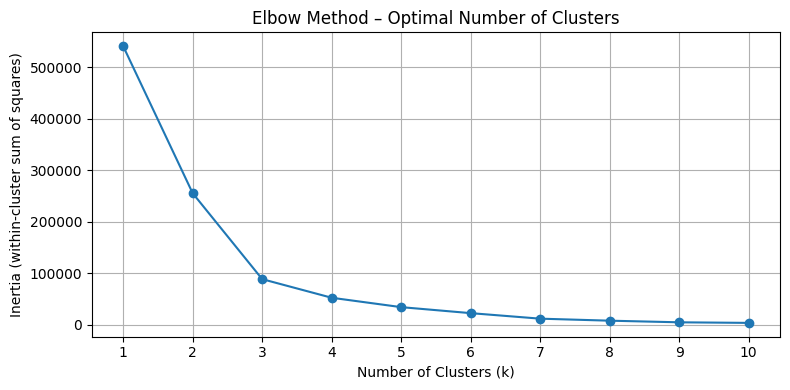

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Elbow method: test different k values
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    inertias.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method – Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.grid(True)
plt.xticks(K_range)
plt.tight_layout()
plt.show()


# Three clusters

Client Count per Cluster:
Cluster
0    367
1      1
2      2
Name: count, dtype: int64

Clustering Evaluation Metrics:
• Silhouette Score        : 0.961  (higher is better, max = 1)
• Calinski-Harabasz Score : 935.94   (higher is better)
• Davies-Bouldin Score    : 0.260  (lower is better)


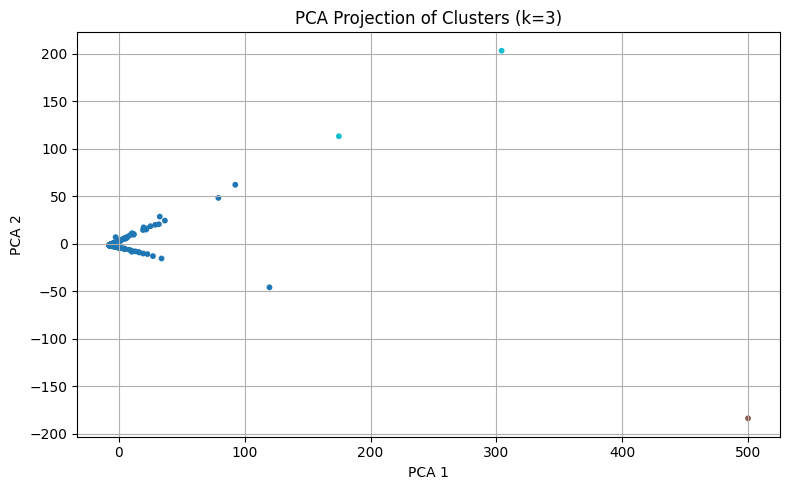

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------
# Step 1: KMeans with k=3
# ----------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X)

# ----------------------------------------
# Step 2: Map client IDs to clusters
# ----------------------------------------
client_cluster_df = pd.DataFrame({
    'ClientID': daily_profiles.index,
    'Cluster': clusters
})

# Print how many clients in each cluster
print("Client Count per Cluster:")
print(client_cluster_df['Cluster'].value_counts().sort_index())

# ----------------------------------------
# Step 3: Evaluation metrics
# ----------------------------------------
sil_score = silhouette_score(X, clusters)
ch_score = calinski_harabasz_score(X, clusters)
db_score = davies_bouldin_score(X, clusters)

print("\nClustering Evaluation Metrics:")
print(f"• Silhouette Score        : {sil_score:.3f}  (higher is better, max = 1)")
print(f"• Calinski-Harabasz Score : {ch_score:.2f}   (higher is better)")
print(f"• Davies-Bouldin Score    : {db_score:.3f}  (lower is better)")

# ----------------------------------------
# Step 4: PCA Visualization
# ----------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", s=10)
plt.title("PCA Projection of Clusters (k=3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Client Count per Cluster:
Cluster
0    364
1      1
2      1
3      4
Name: count, dtype: int64

Clustering Evaluation Metrics:
• Silhouette Score        : 0.935  (higher is better, max = 1)
• Calinski-Harabasz Score : 1134.13   (higher is better)
• Davies-Bouldin Score    : 0.418  (lower is better)


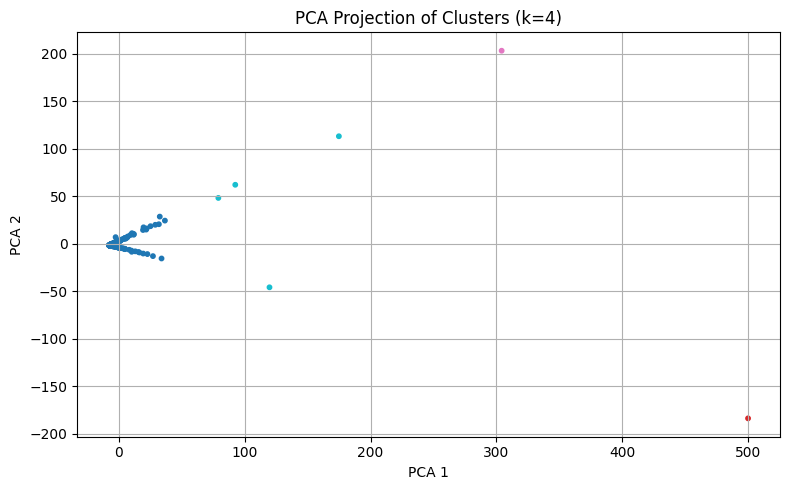

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------
# Step 1: KMeans with k=4
# ----------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X)

# ----------------------------------------
# Step 2: Map client IDs to clusters
# ----------------------------------------
client_cluster_df = pd.DataFrame({
    'ClientID': daily_profiles.index,
    'Cluster': clusters
})

# Print how many clients in each cluster
print("Client Count per Cluster:")
print(client_cluster_df['Cluster'].value_counts().sort_index())

# ----------------------------------------
# Step 3: Evaluation metrics
# ----------------------------------------
sil_score = silhouette_score(X, clusters)
ch_score = calinski_harabasz_score(X, clusters)
db_score = davies_bouldin_score(X, clusters)

print("\nClustering Evaluation Metrics:")
print(f"• Silhouette Score        : {sil_score:.3f}  (higher is better, max = 1)")
print(f"• Calinski-Harabasz Score : {ch_score:.2f}   (higher is better)")
print(f"• Davies-Bouldin Score    : {db_score:.3f}  (lower is better)")

# ----------------------------------------
# Step 4: PCA Visualization
# ----------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", s=10)
plt.title("PCA Projection of Clusters (k=4)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# Cluster Profile Visualization – Average Daily Load

## What the Code Did

* Grouped clients by their **cluster ID** (from KMeans).
* Calculated the **average daily electricity consumption** across all clients in each cluster.
* Plotted the daily profile of each cluster over time.

Each line in the plot represents one cluster's **typical consumption pattern**.

---

## What the Plot Shows

* **X-axis**: Day index (from 2011 to 2014)
* **Y-axis**: Average electricity load (in kW)

### Observations:

* **Cluster 1 (orange)**: Extremely high and fluctuating consumption — likely **large industrial users** or outliers.
* **Cluster 2 (green)**: Moderate but consistent usage with seasonal variation — possibly **commercial clients**.
* **Cluster 3 (red)**: Medium usage with a gradual trend increase — maybe **residential or office buildings**.
* **Cluster 0 (blue)**: Very low and stable usage — likely **small clients** or background consumption.

---

## Why It's Useful

This plot helps:

* Understand behavior of each cluster.
* Identify **outliers** (like Cluster 1).
* Support forecasting, segmentation, or anomaly detection.


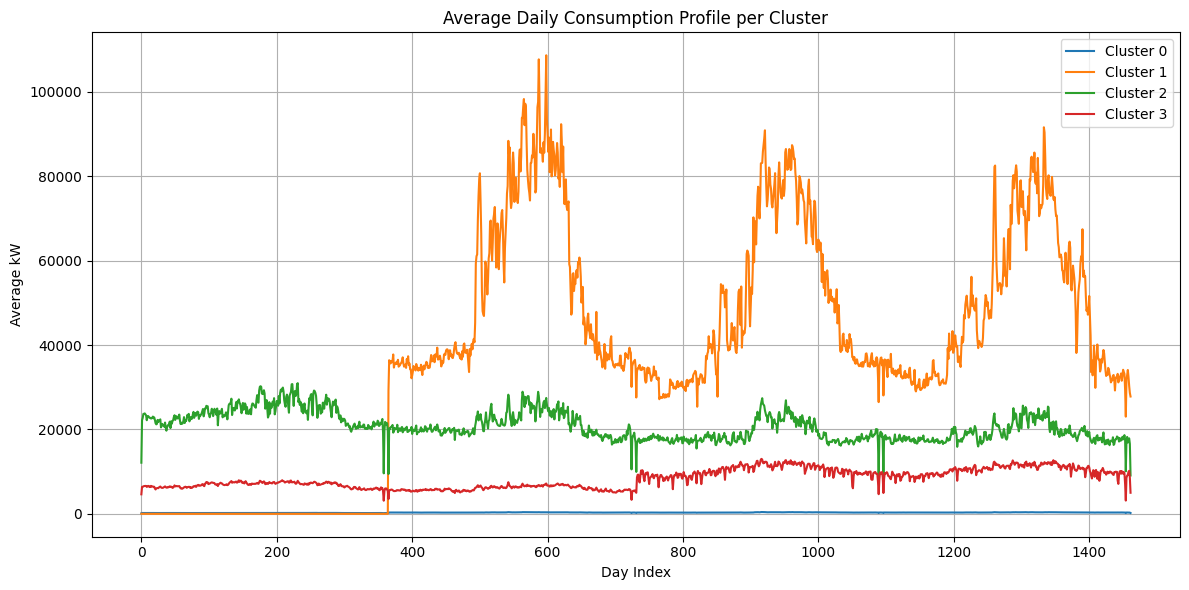

In [34]:
import matplotlib.pyplot as plt

# ----------------------------------------
# Step: Compute average daily profiles per cluster
# ----------------------------------------

# Group client IDs by cluster
cluster_groups = client_cluster_df.groupby("Cluster")["ClientID"].apply(list)

# Get the original daily profiles (already in shape: clients × days)
# Ensure we only include clients still in the cluster mapping
daily_profiles_filtered = daily_profiles.loc[client_cluster_df["ClientID"]]

# Plot average profile per cluster
plt.figure(figsize=(12, 6))
for cluster_id, client_ids in cluster_groups.items():
    cluster_data = daily_profiles_filtered.loc[client_ids]
    cluster_mean = cluster_data.mean(axis=0)  # mean across clients in cluster
    plt.plot(cluster_mean.values, label=f"Cluster {cluster_id}")

plt.title("Average Daily Consumption Profile per Cluster")
plt.xlabel("Day Index")
plt.ylabel("Average kW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
